<a href="https://colab.research.google.com/github/yuna1998/datamining/blob/main/Chapter5_20211010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick',labelsize = 12)

In [3]:
## SVM : 선형, 비선형 분류, 회귀, 이상치 탐색 모두에 사용할 수 있음


In [4]:
from sklearn.svm import SVC
from sklearn import datasets

In [5]:
## 모든 샘플이 바깥쪽에 올바르게 분류 : 하드 마진 분류
## 문제점 1. 데이터가 선형적으로 구분될 수 있어야 제대로 작동
## 문제점 2. 이상치에 매우 민감

In [6]:
## 불꽃 데이터set 적재 후 특성 스케일 변경
## 품종 감지 위해 선형 SVM 훈련 시킴

In [7]:
import numpy as np

In [8]:
from sklearn.pipeline import Pipeline

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [10]:
iris = datasets.load_iris()

In [11]:
X = iris["data"][:, (2,3)] ## 꽃잎 길이, 꽃잎 넓이
y = (iris["target"] ==2).astype(np.float64) ##Iris -Virginica인 것만 추출

In [12]:
svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("Linear_scv", LinearSVC(C= 1, loss = 'hinge')),
])

In [13]:
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Linear_scv',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [14]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [15]:
## 비선형 SVM 분류
## 비선형 dataset 다루는 방법 1. 다항 특성 같은 특성 추가
## PolynomialFeatures 변환기와 StandardScaler, LinearSVC 연결해 Pipeline 만듦

In [16]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [17]:
X,y = make_moons(n_samples = 100, noise = 0.15)

In [19]:
polynomial_svm_clf = Pipeline([
                               ("poly_features", PolynomialFeatures( degree = 3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
])

In [20]:
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [21]:
## 커널 트릭(kernel trick) : 실제로는 특성을 추가하지 않지만. 다항식의 특성을 많이 추가한 것 같은 결과 얻을 수 있음

In [22]:
poly_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5)) ## coef0 : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을 지 조절
])

In [23]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [24]:
## 적절한 하이퍼파러미터를 찾기 위해서는 그리드 탐색 사용해야 함
## 처음에는 그리드 폭 크게 해서 -> 최적의 값 찾기 위해 그리드 세밀하게 검색


In [25]:
## 비선형 다루는 법 2 : 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정(유사도 함수)
## ex) x1 = -2, x2 = 1 추가 tau = 0.3인 가우시안 방사 기저 함수(RBF)를 유사도 함수로 정의
## FBF는 0~1까지 변화하며 종 모양으로 나타남

In [27]:
rbf_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
])

In [28]:
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [29]:
## kernel의 종류 : 문자열 커널(string)은 텍스트 문서나 DNA 서열 분류할 때 사용
## 제일 먼저 선형 커널 가장 먼저 시도해야 함. LinearSVC가 SVC(kernel = "linear")보다 훨씬 빠름
## 훈련 세트가 너무 크지 않다면 RBF 커널 사용해봐도 좋음


In [30]:
## SVM 회귀
## 제한된 마진 오류 안에서 선 안에 가능한 한 많은 샘플이 들어가도록 함
## 선의 폭은 하이퍼파러미터 e로 조절함.

In [31]:
from sklearn.svm import LinearSVR

In [33]:
svm_reg = LinearSVR(epsilon = 1.5)

In [34]:
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [35]:
from sklearn.svm import SVR

In [36]:
svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)

In [37]:
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
## 연습문제 8
iris = datasets.load_iris()

In [45]:
X = iris["data"][:, (2,3)]
y = iris["target"]

In [47]:
setosa_or_versicolor = (y==0) | ( y==1) ## setosa와 versicolor 클래스는 선형적으로 구분 가능

In [48]:
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [51]:
from sklearn.linear_model import SGDClassifier

In [54]:
## 1. C = 3
C = 3
alpha = 1 / ( C * len(X))

In [57]:
lin_clf = LinearSVC(loss = "hinge", C = C, random_state = 42)
svm_clf = SVC(kernel = "linear", C = C)
sgd_clf = SGDClassifier(loss = "hinge", learning_rate = "constant", eta0 = 0.001, alpha = alpha,
                        max_iter = 1000, tol = 1e-3, random_state = 42)

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)
print("LinearSVC:", lin_clf.intercept_, lin_clf.coef_)
print("SVC:", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha = {:.5f}):", format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC: [0.28474272] [[1.05364736 1.09903308]]
SVC: [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha = {:.5f}): 0.0033333333333333335 [0.116] [[0.77555005 0.72820513]]


In [63]:
## 모델의 결정 경계
##각 결정 경계의 기울기 & 편향 계산
w1 = - lin_clf.coef_[0,0] / lin_clf.coef_[0,1] # 기울기
b1 = - lin_clf.intercept_[0] / lin_clf.coef_[0,1] # 편향

w2 = - svm_clf.coef_[0,0] / svm_clf.coef_[0,1]
b2 = - svm_clf.intercept_[0] / svm_clf.coef_[0,1]

w3 = - sgd_clf.coef_[0,0] / sgd_clf.coef_[0,1]
b3 = - sgd_clf.intercept_[0] / sgd_clf.coef_[0,1]

In [64]:
## 결정 경계를 원본 스케일로 변환
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

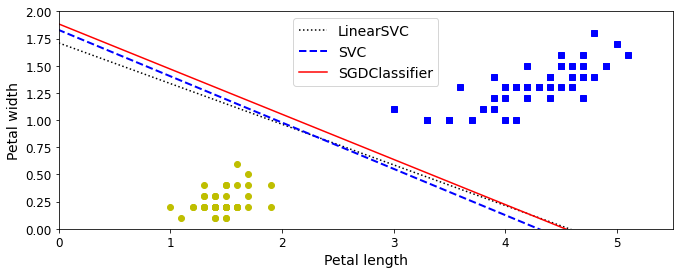

In [65]:
## 결정 경계 그리기
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

LinearSVC: [0.28474272] [[1.05364736 1.09903308]]
SVC: [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha = {:.5f}): 0.002 [0.117] [[0.77714169 0.72981762]]


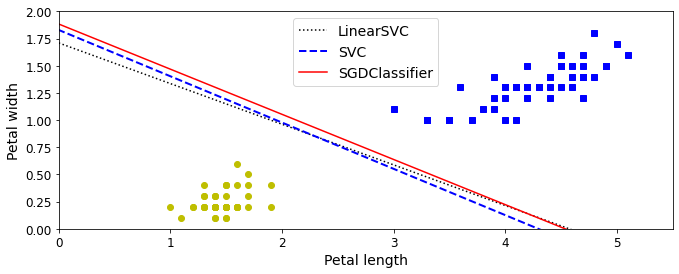

In [66]:
## 1. C = 5
C = 5
alpha = 1 / ( C * len(X))

lin_clf = LinearSVC(loss = "hinge", C = C, random_state = 42)
svm_clf = SVC(kernel = "linear", C = C)
sgd_clf = SGDClassifier(loss = "hinge", learning_rate = "constant", eta0 = 0.001, alpha = alpha,
                        max_iter = 1000, tol = 1e-3, random_state = 42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)
print("LinearSVC:", lin_clf.intercept_, lin_clf.coef_)
print("SVC:", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha = {:.5f}):", format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

w1 = - lin_clf.coef_[0,0] / lin_clf.coef_[0,1] 
b1 = - lin_clf.intercept_[0] / lin_clf.coef_[0,1] 

w2 = - svm_clf.coef_[0,0] / svm_clf.coef_[0,1]
b2 = - svm_clf.intercept_[0] / svm_clf.coef_[0,1]

w3 = - sgd_clf.coef_[0,0] / sgd_clf.coef_[0,1]
b3 = - sgd_clf.intercept_[0] / sgd_clf.coef_[0,1]

line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [ ]:
## 비슷한 모델이 만들어짐